# `Animated proportion plot with play button and a slider`
## _Marcell Kujbus, Data and network Visualization final project, 2018.12.03_
### Implementation of a plotting technique that has not been covered in class
#### Plotly is used

This plot creates an animation, based on a proportion flow. Basically, we need a timeseries which consists of numbers between zero and one. This means that one needs a Date column and a Proportion column defined. 
My dataset can be found under my GitHub profile: https://github.com/kujbika , in the corresponding repository.

Ask questions: marcellkujbus@gmail.com
***
***
        

A little explanation: I implemented an investment strategy, which depends on two input variables. According to these two, the investments evolve differently. <br>
There is a base invesment strategy, that is the easiest: one buys assets in the beginning of the time period, and holds it until the end. <br>
I compare all the sophisticated strategies to this Buy and Hold one. 
The question I want to answer with this plot: **How does the proportion of better strategies evolve in time?**

In [2]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import pandas as pd
import plotly
import plotly.plotly as py
from plotly.graph_objs import *

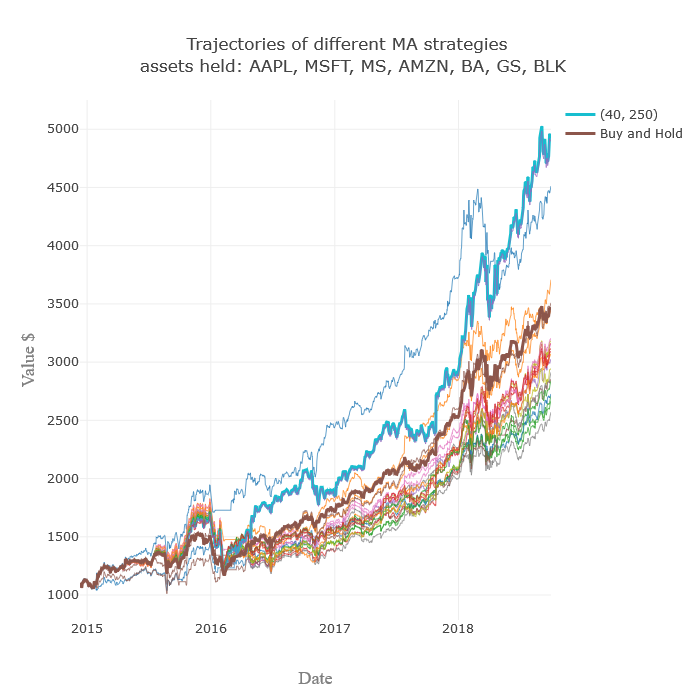

In [9]:
from IPython.display import Image
Image("newplot.png")

In [3]:
example = pd.read_csv("example.csv")

In [4]:
type(example)

pandas.core.frame.DataFrame

In [8]:
example.tail()

,Date,positive,Proportneg
953,2018-09-25,0.28,0.72
954,2018-09-26,0.28,0.72
955,2018-09-27,0.28,0.72
956,2018-09-28,0.28,0.72
957,2018-10-01,0.28,0.72


__So let's create the animated proportion plot with Plotly!__
1. Define a figure dictionary, consisting of data, a layout and a frames keys
2. Fill out the layout with specified needs: sliders and buttons can be added here.
3. Fill out the data with the proportions based on a date. Check the box below to see what is happening
4. Lastly fill out the frame carefully.



In [16]:
init_notebook_mode(connected=True)

#one date monthly from the dataset used
dates = [example['Date'][i] for i in range(0, example.shape[0]) if i % 15 == 0]

# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['title'] = "The proportion of such MA strategies that beat the Buy and Hold <br> The area of the faded circle is 1"
figure['layout']['xaxis'] = dict( range = [0,4],
                                 autorange=False,
                                 showgrid=False,
                                 zeroline=False,
                                 showline=False,
                                 ticks='',
                                 showticklabels=False)
figure['layout']['yaxis'] = dict(range = [0,6],
                                 autorange=False,
                                 showgrid=False,
                                 zeroline=False,
                                 showline=False,
                                 ticks='',
                                 showticklabels=False)
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': dates[0],
    'plotlycommand': 'animate',
    'values': dates,
    'visible': True
}
figure['layout']['shapes'] = [
    {
        'type': 'circle',
        'opacity' : .3,
        'fillcolor': 'rgba(255, 182, 193, .9)',
        'xref': 'x',
        'yref': 'y',
        'x0': 1.55,
        'y0': 0,
        'x1': 2.45,
        'y1': 4,
        'line': {
                'color': 'rgba(50, 171, 96, 1)',} 
    }
    
]
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Date:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
date = dates[0]
dataset_by_date = example[example['Date'] == date]
data_dict = {
        'x': [2],
        'y': [2],
        'hoverinfo' : 'text',
        'mode': 'markers+text',
        'text': list(dataset_by_date['positive']),
        'textposition' : 'middle center',
        'textfont' : {
            'family' :'sans serif',
            'size' : 18,
            'color' : 'blue'},
        'marker': {
            'size': list(dataset_by_date['positive']*200)
        },
        'name': 'Opacity .7'
    }
figure['data'].append(data_dict)
    
# make frames
for date in dates[1:]:
    frame = {'data': [], 'name': date}
    dataset_by_date = example[example['Date'] == date]

    data_dict = {
                'x': [2],
                'y': [2],
                'hoverinfo' : 'text',
                'mode': 'markers+text',
                'text': list(dataset_by_date['positive']),
                'textposition' : 'middle center',
                'textfont' : {
                    'family' :'sans serif',
                    'size' : 18,
                    'color' : 'blue'},
                'marker': {
                    'size': list(dataset_by_date['positive']*200)
                },
                'name': 'Opacity .7'
            }
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [[date], {'frame': {'duration': 300, 'redraw': False},
             'mode': 'immediate',
           'transition': {'duration': 300}}
         ],
         'label': date,
         'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)